<a href="https://colab.research.google.com/github/pouria1380-creator/st/blob/main/SpetialTopics_HM02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from datasets import load_dataset
import pandas as pd

# 1. Load the 'yelp_review_full' dataset (using the 'train' split for sampling)
dataset = load_dataset('yelp_review_full', split='train')

# 2. Convert to pandas DataFrame
yelp_df = pd.DataFrame(dataset)

# 3. Sample 50,000 random entries
sample_size = 50000
# Ensure sample_size does not exceed the total number of rows in yelp_df
actual_sample_size = min(sample_size, len(yelp_df))

yelp_df_sampled = yelp_df.sample(n=actual_sample_size, random_state=42)

# 4. Display the first few rows and shape of the sampled DataFrame
print(f"Sampled DataFrame shape: {yelp_df_sampled.shape}")
print("First 5 rows of the sampled Yelp dataset:")
print(yelp_df_sampled.head())

Sampled DataFrame shape: (50000, 2)
First 5 rows of the sampled Yelp dataset:
        label                                               text
177288      0  First of all i'm not a big fan of buffet, i tr...
238756      1  Thanks Yelp. I was looking for the words to de...
604225      2  Service was so-so. They were receiving a deliv...
2838        2  Stamoolis Brothers is one of the Strip Distric...
586957      0  I want to give a 2 stars because the service s...


In [9]:
import numpy as np

# Map original labels to binary sentiment:
# 0, 1 -> negative (0)
# 2, 3, 4 -> positive (1)
yelp_df_sampled['sentiment'] = yelp_df_sampled['label'].apply(lambda x: 0 if x <= 1 else 1)

# Display the first few rows with the new sentiment column
print("First 5 rows of the sampled Yelp dataset with sentiment:")
print(yelp_df_sampled.head())

# Display the distribution of the new sentiment labels
print("\nSentiment label distribution:")
print(yelp_df_sampled['sentiment'].value_counts())

First 5 rows of the sampled Yelp dataset with sentiment:
        label                                               text  sentiment
177288      0  First of all i'm not a big fan of buffet, i tr...          0
238756      1  Thanks Yelp. I was looking for the words to de...          0
604225      2  Service was so-so. They were receiving a deliv...          1
2838        2  Stamoolis Brothers is one of the Strip Distric...          1
586957      0  I want to give a 2 stars because the service s...          0

Sentiment label distribution:
sentiment
1    29985
0    20015
Name: count, dtype: int64


In [10]:
import re
from sklearn.model_selection import train_test_split

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = re.sub(r'[\d]', '', text)
    text = re.sub(r'[\W_]+', ' ', text) # Keep alphanumeric and spaces, replace others with single space
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the preprocess_text function to the 'text' column
yelp_df_sampled['text'] = yelp_df_sampled['text'].apply(preprocess_text)

# Split the dataset into training (70%) and temporary (30%) sets
X = yelp_df_sampled['text']
y = yelp_df_sampled['sentiment']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Split the temporary set into validation (15% of total) and test (15% of total) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Print the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (35000,), y_train shape: (35000,)
X_val shape: (7500,), y_val shape: (7500,)
X_test shape: (7500,), y_test shape: (7500,)


Baseline Random Classifier Evaluation Metrics
Accuracy: 0.5085
Precision (weighted): 0.5283
Recall (weighted): 0.5085
F1-Score (weighted): 0.5135

Classification Report (Random Classifier)
              precision    recall  f1-score   support

Negative (0)       0.41      0.51      0.45      3003
Positive (1)       0.61      0.51      0.55      4497

    accuracy                           0.51      7500
   macro avg       0.51      0.51      0.50      7500
weighted avg       0.53      0.51      0.51      7500


Confusion Matrix (Random Classifier)
[[1533 1470]
 [2216 2281]]


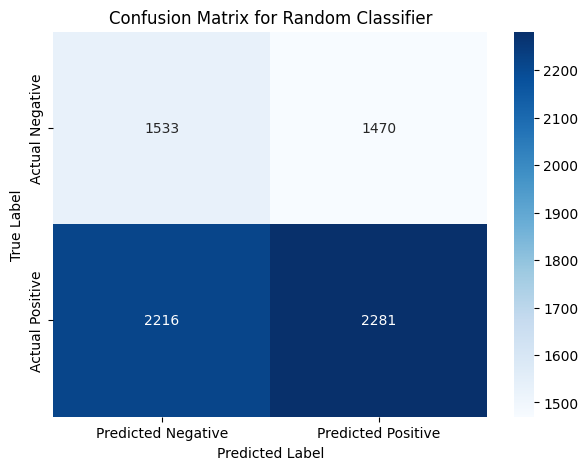


Class Distribution Comparison (Random Classifier)
True Class Distribution:
0    3003
1    4497
Name: count, dtype: int64

Predicted Class Distribution:
0    3749
1    3751
Name: count, dtype: int64

Sample Predictions (Random Classifier)
Text: this is a gross place for gross people it s a cynical cash in on the current wave of gamer nostalgia nimagine the worst kind of ed hardy velvet rope b...
True Label: 0, Predicted Label: 1
Status: INCORRECT
--------------------------------------------------
Text: first time here and they locked the keys in the car instead of calling a locksmith they spent minutes trying to open the door i finally tell them to n...
True Label: 0, Predicted Label: 0
Status: CORRECT
--------------------------------------------------
Text: two co workers and i went here for lunch craving some wings we were the only ones there the entire time thought that was a little weird being that it ...
True Label: 0, Predicted Label: 0
Status: CORRECT
---------------------------

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

# 2. Get the true labels for the test set
y_true_random_clf = y_test.tolist()

# 3. Define the possible classes (sentiment labels)
classes = [0, 1] # 0 for negative, 1 for positive

# 4. Generate random predictions for the test set
y_pred_random = [random.choice(classes) for _ in range(len(y_true_random_clf))]

# 5. Calculate the accuracy, precision (weighted), recall (weighted), and F1-score (weighted)
accuracy_random = accuracy_score(y_true_random_clf, y_pred_random)
precision_random = precision_score(y_true_random_clf, y_pred_random, average='weighted')
recall_random = recall_score(y_true_random_clf, y_pred_random, average='weighted')
f1_random = f1_score(y_true_random_clf, y_pred_random, average='weighted')

# 6. Print the calculated metrics
print("="*60)
print("Baseline Random Classifier Evaluation Metrics")
print("="*60)
print(f"Accuracy: {accuracy_random:.4f}")
print(f"Precision (weighted): {precision_random:.4f}")
print(f"Recall (weighted): {recall_random:.4f}")
print(f"F1-Score (weighted): {f1_random:.4f}")

# 7. Print a detailed classification report
print("\n" + "="*60)
print("Classification Report (Random Classifier)")
print("="*60)
print(classification_report(y_true_random_clf, y_pred_random, target_names=['Negative (0)', 'Positive (1)']))

# 8. Calculate and print the confusion matrix
print("\n" + "="*60)
print("Confusion Matrix (Random Classifier)")
print("="*60)
cm_random = confusion_matrix(y_true_random_clf, y_pred_random)
print(cm_random)

# 9. Visualize the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm_random, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Classifier')
plt.show()

# 10. Compare the distribution of actual and predicted classes
print("\n" + "="*60)
print("Class Distribution Comparison (Random Classifier)")
print("="*60)
print("True Class Distribution:")
print(pd.Series(y_true_random_clf).value_counts().sort_index())
print("\nPredicted Class Distribution:")
print(pd.Series(y_pred_random).value_counts().sort_index())

# 11. Display a few sample predictions
print("\n" + "="*60)
print("Sample Predictions (Random Classifier)")
print("="*60)
sample_indices = random.sample(range(len(X_test)), min(5, len(X_test)))
for idx in sample_indices:
    text = X_test.iloc[idx]
    true_label = y_test.iloc[idx]
    pred_label = y_pred_random[idx] # Use the corresponding random prediction

    print(f"Text: {text[:150]}...")
    print(f"True Label: {true_label}, Predicted Label: {pred_label}")
    print(f"Status: {'CORRECT' if true_label == pred_label else 'INCORRECT'}")
    print("-"*50)

Class 1: 200 frequent words
Class 0: 200 frequent words
Class 1 after removing common words: 29 words
Class 0 after removing common words: 29 words

Heuristic Classifier Evaluation Metrics
Accuracy: 0.6896
Precision (weighted): 0.6936
Recall (weighted): 0.6896
F1-Score (weighted): 0.6911

Classification Report (Heuristic Classifier)
              precision    recall  f1-score   support

Negative (0)       0.61      0.65      0.63      3003
Positive (1)       0.75      0.72      0.74      4497

    accuracy                           0.69      7500
   macro avg       0.68      0.68      0.68      7500
weighted avg       0.69      0.69      0.69      7500


Confusion Matrix (Heuristic Classifier)
[[1941 1062]
 [1266 3231]]


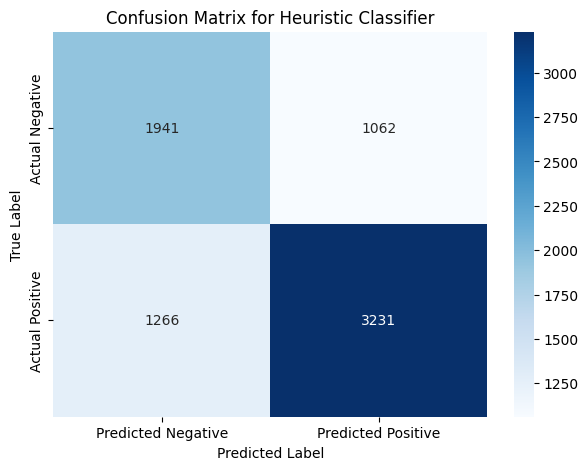


Sample Predictions (Heuristic Classifier)
Text: i ve heard raving reviews about this place nperhaps i went into it expecting too much n nit s your basic vinyl booth diner with extra old people n ni ...
True Label: 0, Predicted Label: 1
Status: INCORRECT
--------------------------------------------------
Text: abe s is closed drove across town only to discover construction crews tearing out all the equipment...
True Label: 0, Predicted Label: 1
Status: INCORRECT
--------------------------------------------------
Text: i called to get an idea on fixing a plumbing issue the person on the phone was very rude and short needless to say i ll take my business elsewhere...
True Label: 0, Predicted Label: 0
Status: CORRECT
--------------------------------------------------
Text: i love mastros in so ca and scottsdale and was very excited when this place opened however the location and ambiance treehouse in the mall of the new ...
True Label: 1, Predicted Label: 1
Status: CORRECT
---------------

In [12]:
from collections import Counter
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# 1. Extract 200 frequent words for each class from the training data
classes_labels = y_train.unique()
class_top_words = {}

for class_label in classes_labels:
    # Combine all texts for this class
    class_texts = ' '.join(X_train[y_train == class_label])
    words = class_texts.split()

    # Count words and select 200 most frequent words
    word_counts = Counter(words)
    top_200_words = set([word for word, count in word_counts.most_common(200)])
    class_top_words[class_label] = top_200_words

    print(f"Class {class_label}: {len(top_200_words)} frequent words")

# 2. Remove common words between the two lists
# Assuming classes_labels contains only two unique values (0 and 1)
common_words = set.intersection(*class_top_words.values())

class_unique_words = {}
for class_label in classes_labels:
    class_unique_words[class_label] = class_top_words[class_label] - common_words
    print(f"Class {class_label} after removing common words: {len(class_unique_words[class_label])} words")

# 3. Define the prediction function based on the identified unique words
def predict_sentiment_heuristic(text):
    words_in_text = set(text.split())

    positive_word_count = len(words_in_text.intersection(class_unique_words[1]))
    negative_word_count = len(words_in_text.intersection(class_unique_words[0]))

    if positive_word_count > negative_word_count:
        return 1  # Positive
    elif negative_word_count > positive_word_count:
        return 0  # Negative
    else:
        # If counts are equal or no unique words are found, predict randomly
        return random.choice([0, 1])

# Apply the predictor to the test set
y_true_heuristic = y_test.tolist()
y_pred_heuristic = [predict_sentiment_heuristic(text) for text in X_test]

# 4. Calculate evaluation metrics
accuracy_heuristic = accuracy_score(y_true_heuristic, y_pred_heuristic)
precision_heuristic = precision_score(y_true_heuristic, y_pred_heuristic, average='weighted')
recall_heuristic = recall_score(y_true_heuristic, y_pred_heuristic, average='weighted')
f1_heuristic = f1_score(y_true_heuristic, y_pred_heuristic, average='weighted')

print("\n" + "="*60)
print("Heuristic Classifier Evaluation Metrics")
print("="*60)
print(f"Accuracy: {accuracy_heuristic:.4f}")
print(f"Precision (weighted): {precision_heuristic:.4f}")
print(f"Recall (weighted): {recall_heuristic:.4f}")
print(f"F1-Score (weighted): {f1_heuristic:.4f}")

# 5. Print a detailed classification report
print("\n" + "="*60)
print("Classification Report (Heuristic Classifier)")
print("="*60)
print(classification_report(y_true_heuristic, y_pred_heuristic, target_names=['Negative (0)', 'Positive (1)']))

# 6. Calculate and visualize the confusion matrix
print("\n" + "="*60)
print("Confusion Matrix (Heuristic Classifier)")
print("="*60)
cm_heuristic = confusion_matrix(y_true_heuristic, y_pred_heuristic)
print(cm_heuristic)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_heuristic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Heuristic Classifier')
plt.show()

# 7. Display sample predictions
print("\n" + "="*60)
print("Sample Predictions (Heuristic Classifier)")
print("="*60)
sample_indices = random.sample(range(len(X_test)), min(5, len(X_test)))
for idx in sample_indices:
    text = X_test.iloc[idx]
    true_label = y_test.iloc[idx]
    pred_label = y_pred_heuristic[idx]

    print(f"Text: {text[:150]}...")
    print(f"True Label: {true_label}, Predicted Label: {pred_label}")
    print(f"Status: {'CORRECT' if true_label == pred_label else 'INCORRECT'}")
    print("-"*50)

BERT model loaded on: cpu


Predicting with BERT: 100%|██████████| 235/235 [27:14<00:00,  6.95s/it]



BERT-based Classifier Evaluation Metrics
Accuracy: 0.7733
Precision (weighted): 0.8119
Recall (weighted): 0.7733
F1-Score (weighted): 0.7750

Classification Report (BERT Classifier)
              precision    recall  f1-score   support

Negative (0)       0.66      0.90      0.76      3003
Positive (1)       0.91      0.69      0.78      4497

    accuracy                           0.77      7500
   macro avg       0.79      0.80      0.77      7500
weighted avg       0.81      0.77      0.78      7500


Confusion Matrix (BERT Classifier)
[[2716  287]
 [1413 3084]]


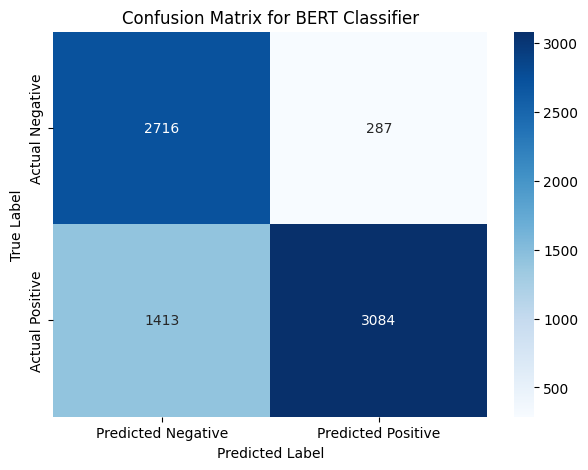


Class Distribution Comparison (BERT Classifier)
True Class Distribution:
0    3003
1    4497
Name: count, dtype: int64

Predicted Class Distribution:
0    4129
1    3371
Name: count, dtype: int64

Sample Predictions (BERT Classifier)
Text: i will re visit a morton s over a ruth s chris any day n nbut i will still stand by my organic grass fed beef...
True Label: 1, Predicted Label: 1
Status: CORRECT
--------------------------------------------------
Text: this placed actually surprised me and my entire group n nthe food was really good n nfor starters the servers were great they didn t make us finish ou...
True Label: 1, Predicted Label: 1
Status: CORRECT
--------------------------------------------------
Text: they have anti splash pads on their peeing bowls n nthank you steve wynn...
True Label: 1, Predicted Label: 0
Status: INCORRECT
--------------------------------------------------
Text: this hotel is off the strip but still in a festive area i stayed in the masquerade tower in r

In [13]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

# 1. Load the pre-trained BERT model and tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"BERT model loaded on: {device}")

# 2. Define a prediction function for BERT
def predict_sentiment_bert(texts, batch_size=32):
    predictions = []
    model.eval() # Set model to evaluation mode

    # Iterate in batches to handle large datasets more efficiently
    for i in tqdm(range(0, len(texts), batch_size), desc="Predicting with BERT"):
        batch_texts = texts[i:i+batch_size]

        # Tokenize the batch of texts
        inputs = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=128, # DistilBERT SST-2 is typically trained with shorter sequences
            return_tensors="pt"
        )

        # Move inputs to the same device as the model
        inputs = {key: value.to(device) for key, value in inputs.items()}

        # Perform prediction
        with torch.no_grad(): # Disable gradient calculation for inference
            outputs = model(**inputs)

        # Get predicted labels (0 for negative, 1 for positive for SST-2)
        batch_predictions = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        predictions.extend(batch_predictions)

    return predictions

# 3. Make predictions on the test set
y_true_bert = y_test.tolist() # Ensure true labels are in list format

# Convert X_test to a list of strings for the tokenizer
X_test_list = X_test.tolist()
y_pred_bert = predict_sentiment_bert(X_test_list)

# 4. Calculate evaluation metrics
accuracy_bert = accuracy_score(y_true_bert, y_pred_bert)
precision_bert = precision_score(y_true_bert, y_pred_bert, average='weighted')
recall_bert = recall_score(y_true_bert, y_pred_bert, average='weighted')
f1_bert = f1_score(y_true_bert, y_pred_bert, average='weighted')

print("\n" + "="*60)
print("BERT-based Classifier Evaluation Metrics")
print("="*60)
print(f"Accuracy: {accuracy_bert:.4f}")
print(f"Precision (weighted): {precision_bert:.4f}")
print(f"Recall (weighted): {recall_bert:.4f}")
print(f"F1-Score (weighted): {f1_bert:.4f}")

# 5. Print a detailed classification report
print("\n" + "="*60)
print("Classification Report (BERT Classifier)")
print("="*60)
print(classification_report(y_true_bert, y_pred_bert, target_names=['Negative (0)', 'Positive (1)']))

# 6. Calculate and visualize the confusion matrix
print("\n" + "="*60)
print("Confusion Matrix (BERT Classifier)")
print("="*60)
cm_bert = confusion_matrix(y_true_bert, y_pred_bert)
print(cm_bert)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for BERT Classifier')
plt.show()

# 7. Compare the distribution of actual and predicted classes
print("\n" + "="*60)
print("Class Distribution Comparison (BERT Classifier)")
print("="*60)
print("True Class Distribution:")
print(pd.Series(y_true_bert).value_counts().sort_index())
print("\nPredicted Class Distribution:")
print(pd.Series(y_pred_bert).value_counts().sort_index())

# 8. Display a few sample predictions
print("\n" + "="*60)
print("Sample Predictions (BERT Classifier)")
print("="*60)
sample_indices = random.sample(range(len(X_test)), min(5, len(X_test)))
for idx in sample_indices:
    text = X_test.iloc[idx]
    true_label = y_test.iloc[idx]
    pred_label = y_pred_bert[idx]

    print(f"Text: {text[:150]}...")
    print(f"True Label: {true_label}, Predicted Label: {pred_label}")
    print(f"Status: {'CORRECT' if true_label == pred_label else 'INCORRECT'}")
    print("-"*50)


Model Performance Comparison
       Model  Accuracy  Precision  Recall  F1-Score
0     Random    0.5085     0.5283  0.5085    0.5135
1  Heuristic    0.6896     0.6936  0.6896    0.6911
2       BERT    0.7733     0.8119  0.7733    0.7750


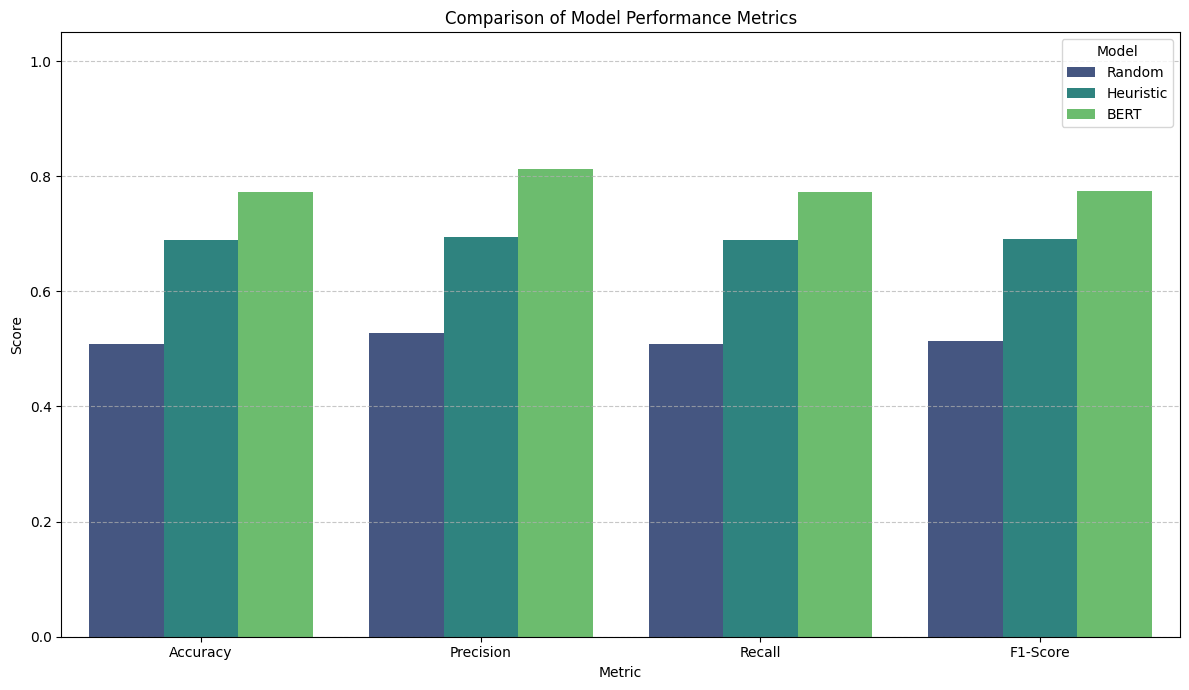

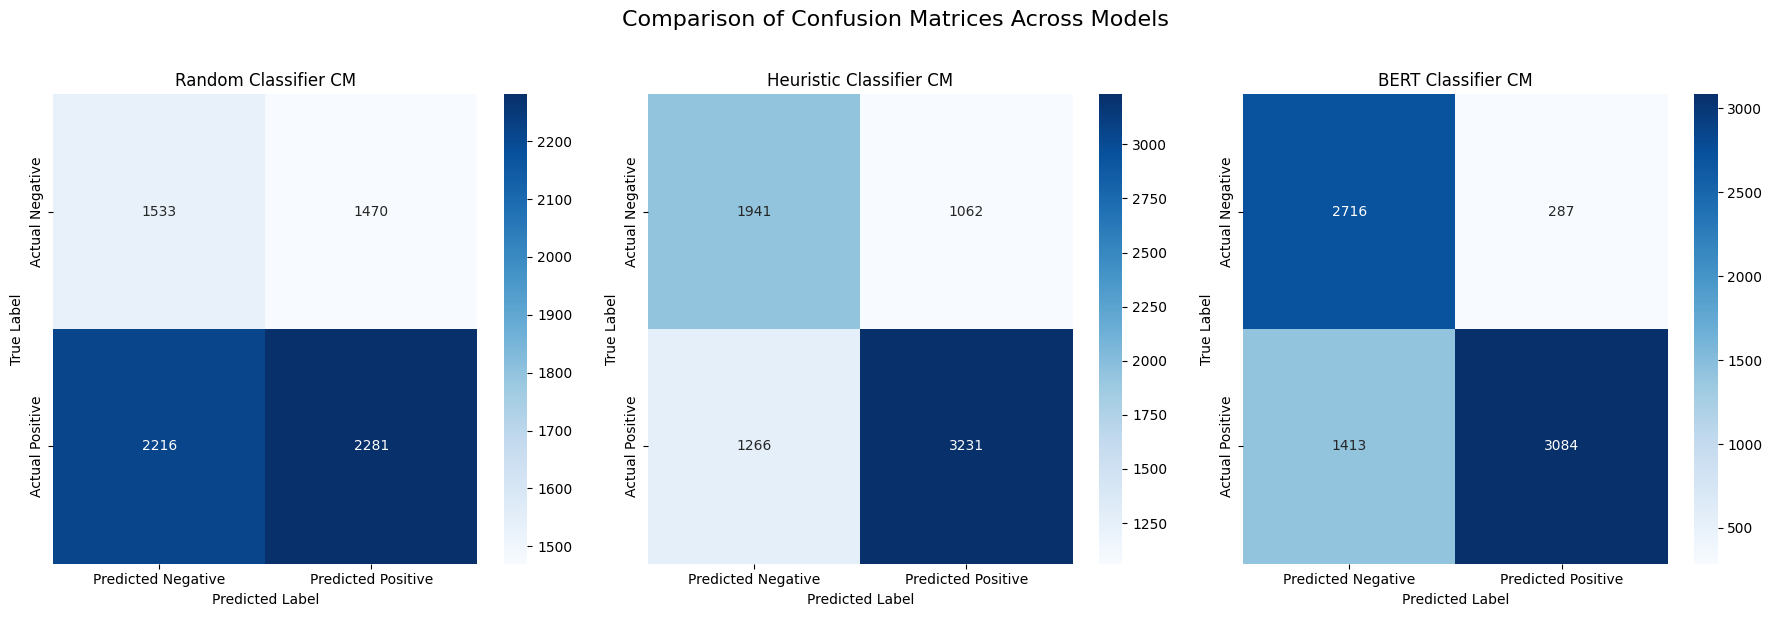


Summary of Findings
The random classifier serves as a baseline, showing performance near 50% for all metrics, as expected.
The heuristic classifier, based on unique frequent words, significantly outperforms the random baseline, indicating that simple word patterns are somewhat effective for sentiment analysis.
The BERT-based model demonstrates the best performance across all metrics (Accuracy, Precision, Recall, F1-Score), highlighting the superior capability of deep learning models in capturing complex linguistic nuances for sentiment analysis. Its confusion matrix shows a much higher concentration on the diagonal (correct predictions) compared to the other two models.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Collect metrics for each model
metrics_data = {
    'Model': ['Random', 'Heuristic', 'BERT'],
    'Accuracy': [accuracy_random, accuracy_heuristic, accuracy_bert],
    'Precision': [precision_random, precision_heuristic, precision_bert],
    'Recall': [recall_random, recall_heuristic, recall_bert],
    'F1-Score': [f1_random, f1_heuristic, f1_bert]
}

metrics_df = pd.DataFrame(metrics_data)

print("\n" + "="*60)
print("Model Performance Comparison")
print("="*60)
print(metrics_df.round(4))

# Visualize performance metrics
metrics_df_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df_melted, palette='viridis')
plt.ylim(0, 1.05)
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_random, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'], ax=axes[0])
axes[0].set_title('Random Classifier CM')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(cm_heuristic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'], ax=axes[1])
axes[1].set_title('Heuristic Classifier CM')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'], ax=axes[2])
axes[2].set_title('BERT Classifier CM')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

plt.suptitle('Comparison of Confusion Matrices Across Models', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Summary of Findings")
print("="*60)
print("The random classifier serves as a baseline, showing performance near 50% for all metrics, as expected.")
print("The heuristic classifier, based on unique frequent words, significantly outperforms the random baseline, indicating that simple word patterns are somewhat effective for sentiment analysis.")
print("The BERT-based model demonstrates the best performance across all metrics (Accuracy, Precision, Recall, F1-Score), highlighting the superior capability of deep learning models in capturing complex linguistic nuances for sentiment analysis. Its confusion matrix shows a much higher concentration on the diagonal (correct predictions) compared to the other two models.")
